In [1]:
!pip3 uninstall -y opencv-contrib-python 
!pip3 uninstall -y opencv-python

!pip3 install opencv-contrib-python
!pip3 install opencv-python
# !pip install opencv-contrib-python==3.4.2.17
# !pip3 install opencv-python==3.4

Found existing installation: opencv-contrib-python 4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Successfully uninstalled opencv-contrib-python-4.1.2.30
Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 66.7 MB 26 kB/s 
     |████████████████████████████████| 60.5 MB 59 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import numpy as np
from numpy.linalg import norm
import cv2 as cv
import matplotlib.pyplot as plt
import argparse
import math
import cv2
from google.colab.patches import cv2_imshow

In [4]:
img1_name = 'cn-tower.jpg'
img2_name = 'cn-tower2.jpg'

img1 = cv2.imread(img1_name)  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread(img2_name)  
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [5]:
detector = cv2.AKAZE_create()
(kps1, descs1) = detector.detectAndCompute(gray1, None)
(kps2, descs2) = detector.detectAndCompute(gray2, None)

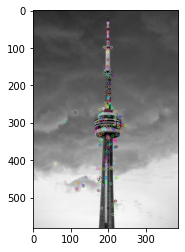

In [6]:
img_1_key = cv2.drawKeypoints(gray1,kps1,img1)
plt.imshow(img_1_key)

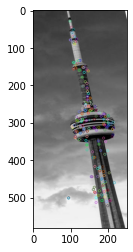

In [7]:
img_2_key = cv2.drawKeypoints(gray2,kps2,img2)
plt.imshow(img_2_key)

In [90]:
def BF_FeatureMatcher(des1,des2):
    brute_force = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
    no_of_matches = brute_force.match(des1,des2)
 
    no_of_matches = sorted(no_of_matches,key=lambda x:x.distance)
    return no_of_matches

In [91]:
def display_output(pic1,kpt1,pic2,kpt2,best_match):
    output_image = cv2.drawMatches(pic1,kpt1,pic2,kpt2,best_match,None,flags=2)
    cv2_imshow(output_image)

In [94]:
number_of_matches = BF_FeatureMatcher(descs1,descs2)
tot_feature_matches = len(number_of_matches)
 
# printing total number of feature matches found
print(f'Total Number of Features matches found are {tot_feature_matches}')

Total Number of Features matches found are 107


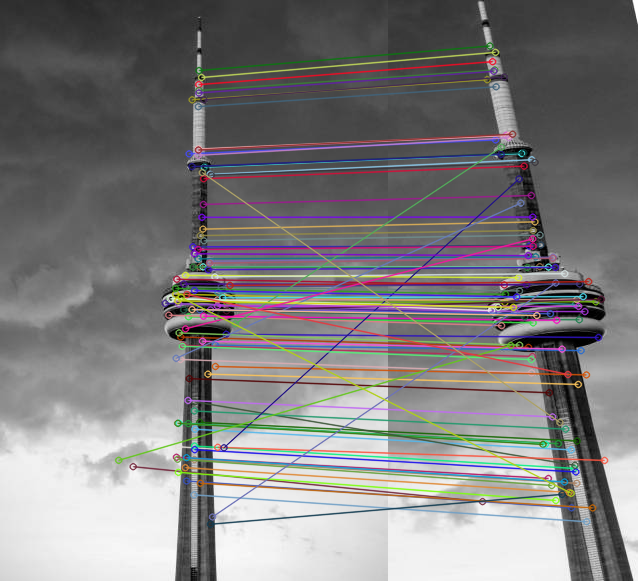

In [95]:
display_output(gray1,kps1,gray2,kps2,number_of_matches)

In [77]:
def my_matcher(kps1, descs1, kps2, descs2,img1, img2):
  matches = []
  for i in range(len(descs1)):
    for j in range(len(descs2)):
      distance = norm(descs1[i] - descs2[j])
      if distance < 800:
        matches.append((distance,i,j))
      
  match_to_draw = []
  for match in matches:
    match_to_draw.append(cv.DMatch(_distance=match[0], _imgIdx=0, _queryIdx=match[1], _trainIdx=match[2]))


  return match_to_draw

In [99]:
def draw_my_matcher(kps1, kps2, match_points_to_draw, gray1, gray2):
  img_with_matches = cv.drawMatches(gray1, kps1, gray2, kps2, match_points_to_draw, None,
  flags=2)
  plt.figure(figsize=(10,20))
  plt.imshow(img_with_matches) 
  plt.show()

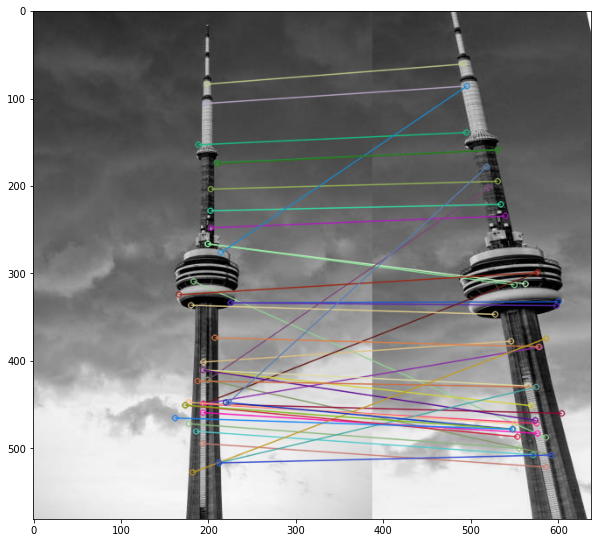

In [100]:
matches_to_draw = my_matcher(kps1, descs1, kps2, descs2,gray1,gray2)
draw_my_matcher(kps1, kps2, matches_to_draw, gray1, gray2)

In [88]:
img3_name = 'monument.jpg'
img4_name = 'monument2.jpg'

img3 = cv2.imread(img3_name)  
gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

img4 = cv2.imread(img4_name)  
gray4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

In [89]:
detector = cv2.AKAZE_create()
(kps3, descs3) = detector.detectAndCompute(gray3, None)
(kps4, descs4) = detector.detectAndCompute(gray4, None)

In [96]:
number_of_matches = BF_FeatureMatcher(descs3,descs4)
tot_feature_matches = len(number_of_matches)
 
# printing total number of feature matches found
print(f'Total Number of Features matches found are {tot_feature_matches}')

Total Number of Features matches found are 502


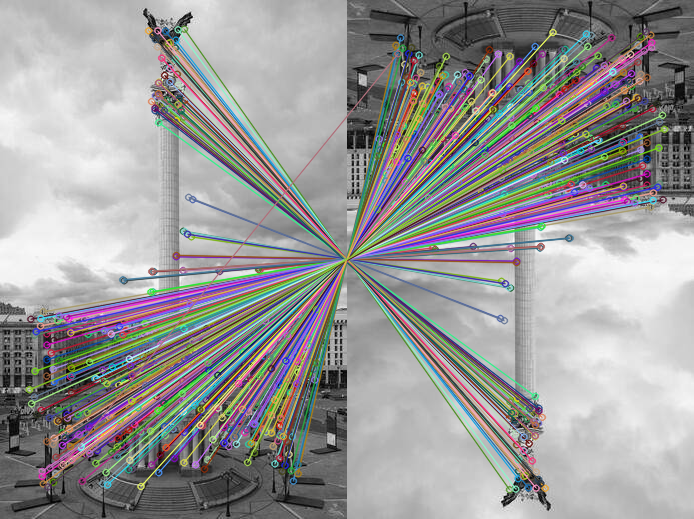

In [98]:
display_output(gray3,kps3,gray4,kps4,number_of_matches)

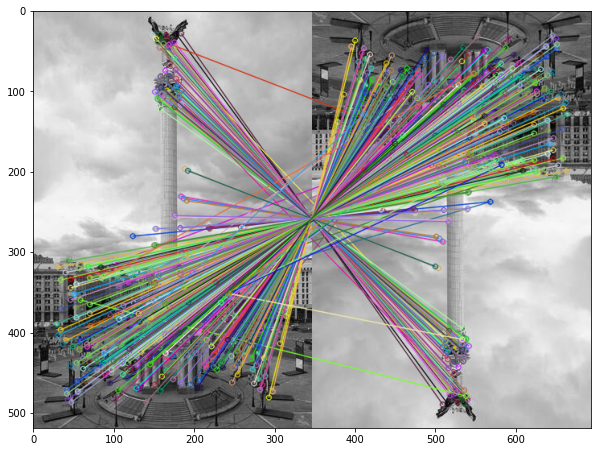

In [101]:
matches_to_draw = my_matcher(kps3, descs3, kps4, descs4, gray3, gray4)
draw_my_matcher(kps3, kps4, matches_to_draw, gray3, gray4)